<a href="https://colab.research.google.com/github/AryamanTamotia/GoogleSolution/blob/main/gdsc_yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

In [ ]:
# Read the CSV file
data = pd.read_csv("/content/sample_data/yield.csv")
data.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [ ]:
data.columns


Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')

In [ ]:
data.shape

(29641, 12)

In [ ]:
data.isnull().sum()

Domain Code     0
Domain          0
Area Code       0
Area            0
Element Code    0
Element         0
Item Code       0
Item            0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29641 entries, 0 to 29640
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   29641 non-null  object
 1   Domain        29641 non-null  object
 2   Area Code     29641 non-null  int64 
 3   Area          29641 non-null  object
 4   Element Code  29641 non-null  int64 
 5   Element       29641 non-null  object
 6   Item Code     29641 non-null  int64 
 7   Item          29641 non-null  object
 8   Year Code     29641 non-null  int64 
 9   Year          29641 non-null  int64 
 10  Unit          29641 non-null  object
 11  Value         29641 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.7+ MB


In [ ]:
categorical = ['Domain Code', 'Domain', 'Area', 'Element', 'Item', 'Unit']
numerical = ['Area Code', 'Element Code', 'Item Code', 'Value', 'Year', 'Year Code']

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [ ]:
data.reset_index(drop=True)
data.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [ ]:
df = data[['Area', 'Item', 'Year', 'Value']]

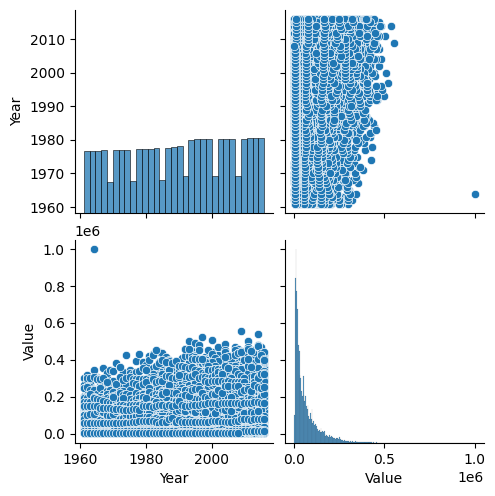

In [ ]:
sns.pairplot(df)

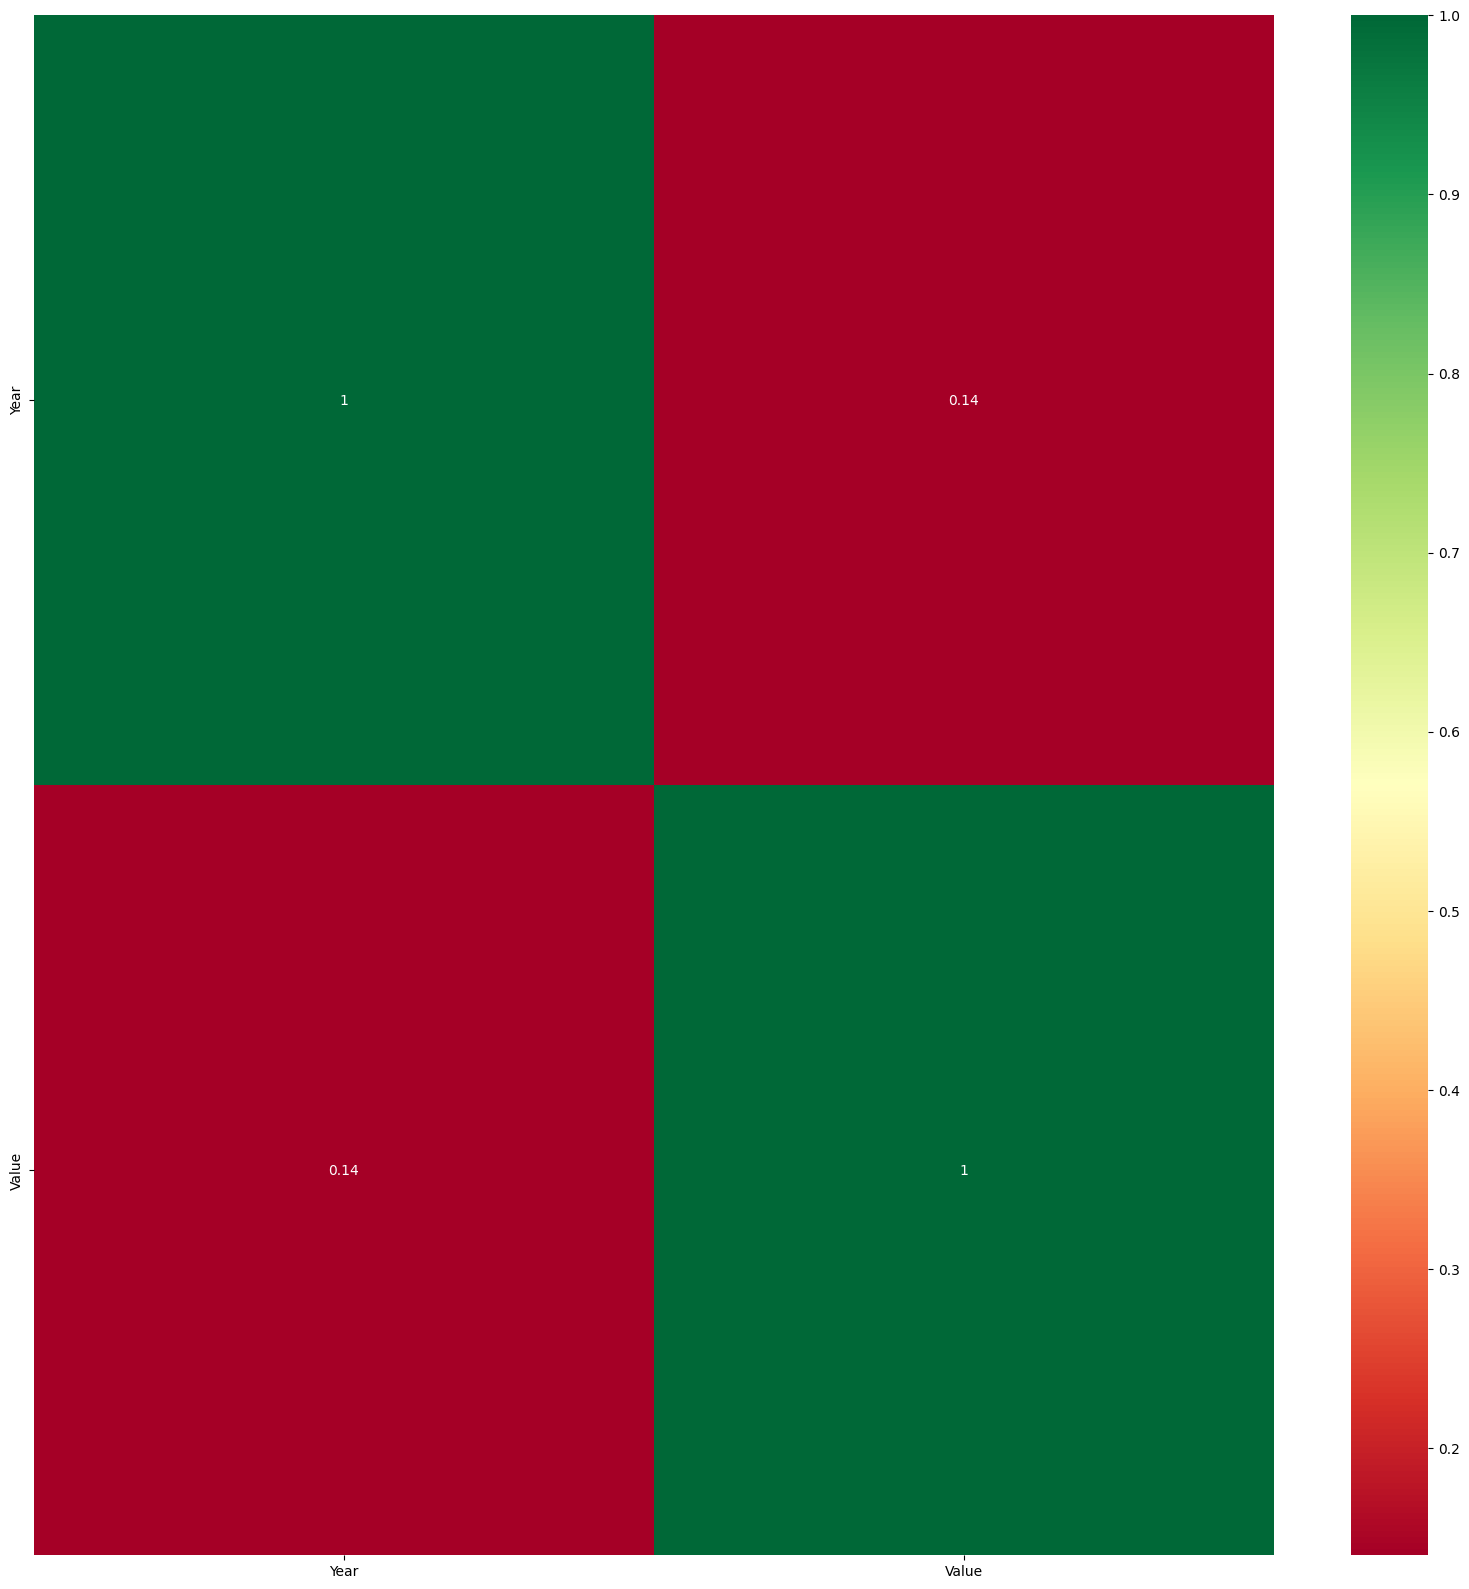

In [ ]:

#get correlations of each features in dataset
corrmat = df.corr()

top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### one hot encoding

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X.columns

Index(['Area', 'Item', 'Year'], dtype='object')

In [ ]:
dummies=pd.get_dummies(X[['Area', 'Item']], drop_first = True)

In [ ]:
X=pd.concat([X,dummies],axis=1)

In [ ]:
l = ['Area', 'Item', 'Year']

In [ ]:
X.drop(l,inplace=True,axis=1)

In [ ]:
X.columns

Index(['Area_Albania', 'Area_Algeria', 'Area_American Samoa', 'Area_Angola',
       'Area_Antigua and Barbuda', 'Area_Argentina', 'Area_Armenia',
       'Area_Australia', 'Area_Austria', 'Area_Azerbaijan',
       ...
       'Area_Liberia', 'Item_Maize', 'Item_Plantains and others',
       'Item_Potatoes', 'Item_Rice, paddy', 'Item_Sorghum', 'Item_Soybeans',
       'Item_Sweet potatoes', 'Item_Wheat', 'Item_Yams'],
      dtype='object', length=117)

#### standardization

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print('accuracy =',np.round(r2_score(y_test, y_pred),3)*100,"%")
print("loss",mean_squared_error(y_test,y_pred))

accuracy = 65.10000000000001 %
loss 1603485968.156391


#### Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=0)

In [ ]:
rf_random.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=  24.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=  24.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [ ]:
rf_random.best_score_

-1361879774.4944239

In [ ]:
predictions=rf_random.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print('accuracy =',np.round(r2_score(y_test, predictions),3)*100,"%")
print("loss",mean_squared_error(y_test,predictions))

accuracy = 71.0 %
loss 1334791714.1602578


### Groupby

In [ ]:
for i in df.columns:
    
    ordinal_labels = df.groupby([i])['Value'].mean().sort_values().to_dict()
    print(ordinal_labels)
    #ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,0)}
    df[i] = df[i].map(ordinal_labels)

{'Botswana': 8631.375, 'Eritrea': 16718.71875, 'Gambia': 17118.477678571428, 'Djibouti': 18042.36111111111, 'Central African Republic': 24617.54591836735, 'Liberia': 25778.35648148148, 'Guinea-Bissau': 29062.27626459144, 'Bhutan': 29516.007434944237, "Côte d'Ivoire": 29783.974654377882, 'Democratic Republic of the Congo': 32848.20714285714, 'Gabon': 33894.961956521736, 'Burkina Faso': 33902.86386138614, 'Burundi': 34379.39087301587, 'Angola': 35077.59189189189, 'Equatorial Guinea': 36333.963768115944, 'Ethiopia PDR': 37582.25446428572, 'Antigua and Barbuda': 38292.90410958904, 'Chad': 38811.9485458613, 'Cayman Islands': 38917.71895424837, 'Iraq': 39669.79192546584, 'Cameroon': 39885.41477272727, 'Azerbaijan': 41099.311594202896, 'Grenada': 41131.1015625, 'Kazakhstan': 41304.306666666664, 'Georgia': 42971.45, 'Ecuador': 43204.15950920245, 'Albania': 43709.47777777778, 'Lesotho': 43853.99107142857, 'Algeria': 44455.810035842296, 'Benin': 45100.670918367345, 'Bulgaria': 45236.06875, 'Kyrg

<ipython-input-22-1a56cb2dc4f4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].map(ordinal_labels)
<ipython-input-22-1a56cb2dc4f4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].map(ordinal_labels)
<ipython-input-22-1a56cb2dc4f4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [ ]:
df.head()

,Area,Item,Year,Value
0,47111.674107,30042.153425,47119.558333,14000.0
1,47111.674107,30042.153425,47565.683333,14000.0
2,47111.674107,30042.153425,48217.093750,14260.0
3,47111.674107,30042.153425,50877.393750,14257.0
4,47111.674107,30042.153425,49636.989583,14400.0


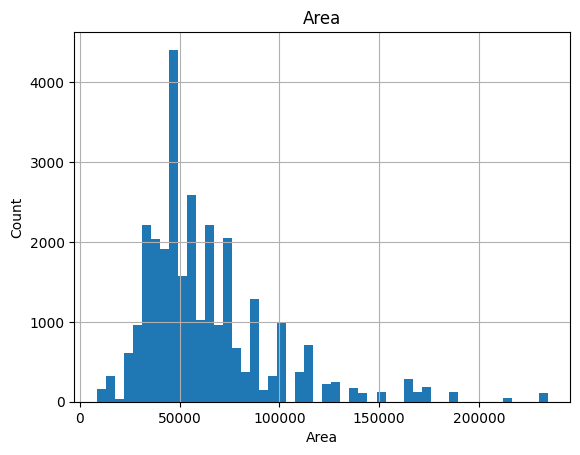

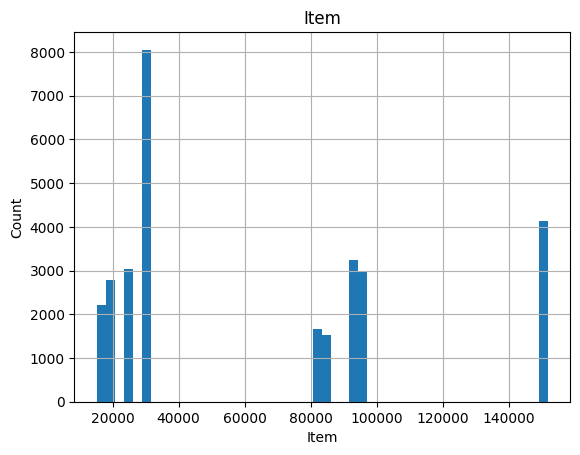

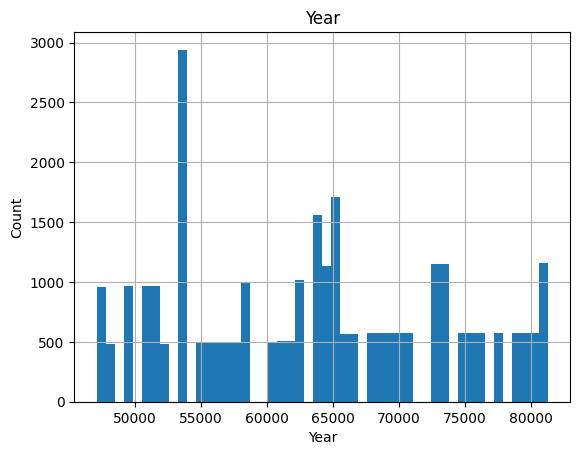

In [ ]:
for feature in df.columns[:-1]:
    data1=df.copy()
    figure=data1[feature].hist(bins=50)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

#### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print('accuracy =',np.round(r2_score(y_test, y_pred),3)*100,"%")
print("loss",mean_squared_error(y_test,y_pred))

accuracy = 63.9 %
loss 1612202902.412579


#### Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=0, error_score='raise')

In [ ]:
rf_random.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=  10.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=  10.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=  12.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   9.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=  10.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   3.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_est

RandomizedSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [ ]:
rf_random.best_score_

-675584032.97102

In [ ]:
predictions=rf_random.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print('accuracy =',np.round(r2_score(y_test, predictions),3)*100,"%")
print("loss",mean_squared_error(y_test,predictions))

accuracy = 87.6 %
loss 554075576.64089
